In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# An attempt to understand autoregressive integrated moving average (ARIMA).
# https://otexts.com/fpp2/arima.html
#
# This notebook follows steps taken in the paper 'Next-Day Bitcoin Price Forecast' (Munim 2019).
#
# https://www.mdpi.com/1911-8074/12/2/103/htm

In [ ]:
# This notebook uses data collected from coindesk
# https://www.coindesk.com/price/bitcoin
# Prices range from 07/18/2010 - 02/16/21

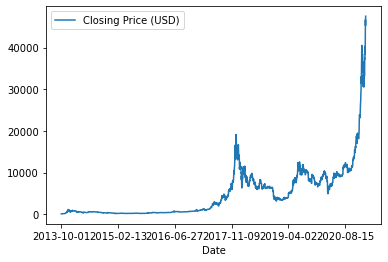

In [15]:
# Initial data visualization
# Plot 1: Bitcoin price 
#
# Checking for stationary data (links and partial explanations below)

bitcoin = pd.read_csv("bitcoin.csv")
bitcoin.plot(x='Date', y='Closing Price (USD)')
plt.show()

# Upward trend and evidence of seasonality. Data is not stationary.

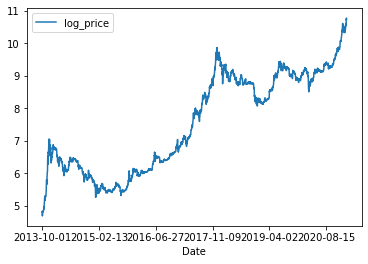

In [19]:
bitcoin['log_price'] = np.log(bitcoin['Closing Price (USD)'])
bitcoin.plot(x='Date', y='log_price')
plt.show()

# Upware trend and evidence of seasonality. Not stationary.

In [54]:
# First difference of log represents the percentage change in y from period to period.
# Transforms the price into stationary data
# Stationary data is a prequisite for predictive modeling (ARIMA).
#
# https://en.wikipedia.org/wiki/Stationary_process

x = np.diff(bitcoin['log_price'])
print(x.size)
x

2680


array([ 0.01445178, -0.14441542,  0.08885409, ...,  0.0428588 ,
       -0.03127966,  0.04882275])

In [55]:
# numpy's 'diff' function is returning an ndarray one index less
# than the number of rows in the dataframe. As a workaround I duplicate
# the last entry in the dataframe. 

bitcoin['first_diff_log_price'] = np.append(x,x[-1])

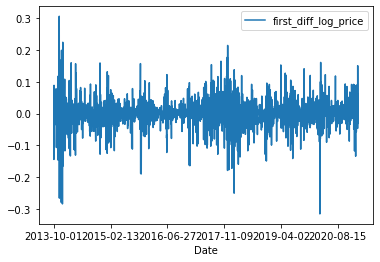

In [57]:
bitcoin.plot(x='Date', y='first_diff_log_price')
plt.show()

In [ ]:
# Statistical tests to check if data is stationary.
# https://machinelearningmastery.com/time-series-data-stationary-python/

